# Analiza podataka o kupovin nekretnina na bazi dobi i zanimanja

Antonio Brković

Mentor:Prof. dr. sc. Markus Schatten

## Uvod

Tijekom i nakon Covid-19 pandemije došlo je do povećanja cijena, a to uključuje i cijenu nekretnina. Dok gledamo filmove i serije svi vidimo stereotipe vezane uz kakve nekretnine imaju osobe ovisno o njihovoj dobi i ovisno o zanimanju. Kao mlada osoba koja još uvijek nije sigurna čime se želi baviti imao sam želju vidjeti ispravnost tih stereotipa. Naravno podaci koje koristim nisu stvarni pa nećemo moći dokazati jesu li stereotipi ispravni ili ne, ali za korist projekta zamislit ćemo da jesu.


## Opis implementacije

### Pandas


Pandas je biblioteka za Python koju sam koristio za učitavanje, manipulaciju i analizu podataka iz CSV i JSON datoteka (read_csv,read_json, merge...).

### Seaborn


Seaborn je biblioteka za vizualizaciju podataka zasnovana na Matplotlib-u. Pruža sučelje visoke razine za crtanje atraktivnih i informativnih statističkih grafikona. U našem slučaju, koristili smo Seaborn za poboljšanje estetike i interpretacije grafikona.

### Matplotlib

Matplotlib je biblioteka za vizualizaciju podataka u Pythonu. Koristi se za stvaranje statičkih, animiranih i interaktivnih vizualizacija. U ovom projektu, korištena je za stvaranje grafikona i dijagrama koji vizualiziraju analizu podataka.

### SQLite

SQLite je C-jezgrena biblioteka koja pruža laganu disk-baziranu bazu podataka. Ne zahtijeva zaseban server proces i omogućuje pristup bazama podataka koristeći ne-standarde varijante SQL upita. Korišten je za pohranu i manipulaciju podacima unutar lokalne baze podataka.

### Okruženja

Tijekom ovog projekta koristio sam različita okruženja koja, a to su: JupyterNotebook, Pycharm i DB Browser. Python kod sam sav pisao u Jupyter-u no imao sam problema kada sam htio pristupiti podacima iz baze podataka, problem sam riješio tako što sam koristio Pycharm, no sav kod se nalazi unutar ovog dokumenta. Također za generiranje podataka sam koristio GenerateData.

## Prikaz rada aplikacije

In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Učitavanje JSON datoteke u Pandas DataFrame
json_path = 'C:\\Users\\abrko\\Downloads\\data-ZbGOCzenxB8TFlAOhKdH5.json'
json_data = pd.read_json(json_path)

# Učitavanje CSV datoteke
csv_path = 'C:\\Users\\abrko\\Downloads\\data-Vf8q5quxd_tHy_hr7WLIn.csv'  
csv_data = pd.read_csv(csv_path)

# Prikaz prvih nekoliko redova ažuriranog DataFrame-a
print(json_data.head())
print(csv_data.head())

  tip_nekretnine    currency  godina_izgradnje prisutnost_dvorišta  id_kupca
0        Dupleks  $855808.85              2019                  No         1
1         Studio  $957465.47              1966                 Yes         2
2        Dupleks  $122017.93              1971                  No         3
3           Vila  $907527.74              2005                 Yes         4
4           Vila  $870408.17              1970                 Yes         5
      ime_prezime  numberrange boolean      zanimanje        city  \
0    Yuri Sellers           44       F       Psiholog       Opole   
1    Emery Wagner           24       F         Doktor       Patos   
2   Sybil Goodwin           51       F  Fitnes Trener     Geylang   
3  Silas Marshall           58       M        Konobar   Hải Phòng   
4  Noelani Snider           34       M      Programer  Upper Hutt   

           date  id_kupca  
0   Dec 5, 2023         1  
1   Jul 4, 2023         2  
2  Aug 20, 2023         3  
3  Dec 10, 

In [5]:
# Spajanje JSON i CSV datoteke uz pomoć 'id_kupca'
combined_data = pd.merge(csv_data, json_data, on='id_kupca', how='inner')

# Prikaz prvih nekoliko redova ažuriranog DataFrame-a
print(combined_data.head())

      ime_prezime  numberrange boolean      zanimanje        city  \
0    Yuri Sellers           44       F       Psiholog       Opole   
1    Emery Wagner           24       F         Doktor       Patos   
2   Sybil Goodwin           51       F  Fitnes Trener     Geylang   
3  Silas Marshall           58       M        Konobar   Hải Phòng   
4  Noelani Snider           34       M      Programer  Upper Hutt   

           date  id_kupca tip_nekretnine    currency  godina_izgradnje  \
0   Dec 5, 2023         1        Dupleks  $855808.85              2019   
1   Jul 4, 2023         2         Studio  $957465.47              1966   
2  Aug 20, 2023         3        Dupleks  $122017.93              1971   
3  Dec 10, 2023         4           Vila  $907527.74              2005   
4   Nov 7, 2023         5           Vila  $870408.17              1970   

  prisutnost_dvorišta  
0                  No  
1                 Yes  
2                  No  
3                 Yes  
4                 Ye

In [ ]:
from flask import Flask, jsonify

db_path = r'C:\Users\abrko\OneDrive\Radna površina\Školovanje\Fakultet\Treća godina\Peti semestar\Uvod u umjetnu inteligenciju\analiza_nekretnine.db'
conn = sqlite3.connect(db_path)  # Povezivanje s SQLite bazom podataka na navedenoj putanji

combined_data.to_sql('nekretnine', conn, if_exists='replace', index=False)  
# Spremanje 'combined_data' DataFrame-a u SQLite bazu podataka pod imenom 'nekretnine', u slučaju da već postoji zamijenit ćemo je ('replace'), index nije uključen


conn.close()  # Zatvara vezu s bazom podataka nakon završetka operacija

# Stvaranje Flask aplikacije
app = Flask(__name__)

# Funkcija za uspostavljanje veze s bazom podataka
def get_db_connection():
    conn = sqlite3.connect('C:\\Users\\abrko\\OneDrive\\Radna površina\\Školovanje\\Fakultet\\Treća godina\\Peti semestar\\Uvod u umjetnu inteligenciju\\analiza_nekretnine.db')
    conn.row_factory = sqlite3.Row  # Formatiranje redova kao rječnika
    return conn

# Definiranje rute API-ja
@app.route('/api/data', methods=['GET'])
def get_data():
    conn = get_db_connection()  # Uspostavljanje veze s bazom podataka
    cursor = conn.cursor()  # Kreiranje kursora za izvođenje SQL upita
    cursor.execute('SELECT * FROM nekretnina')  # Izvršavanje SQL upita za dohvat podataka iz tablice
    data = cursor.fetchall()  # Dohvaćanje svih redova rezultata upita
    conn.close()  # Zatvaranje veze s bazom podataka

    data_list = [dict(ix) for ix in data]  # Pretvaranje rezultata upita u listu rječnika
    return jsonify(data_list)  # Povrat rezultata kao JSON

# Pokretanje Flask aplikacije
if __name__ == '__main__':
    app.run(debug=True)  


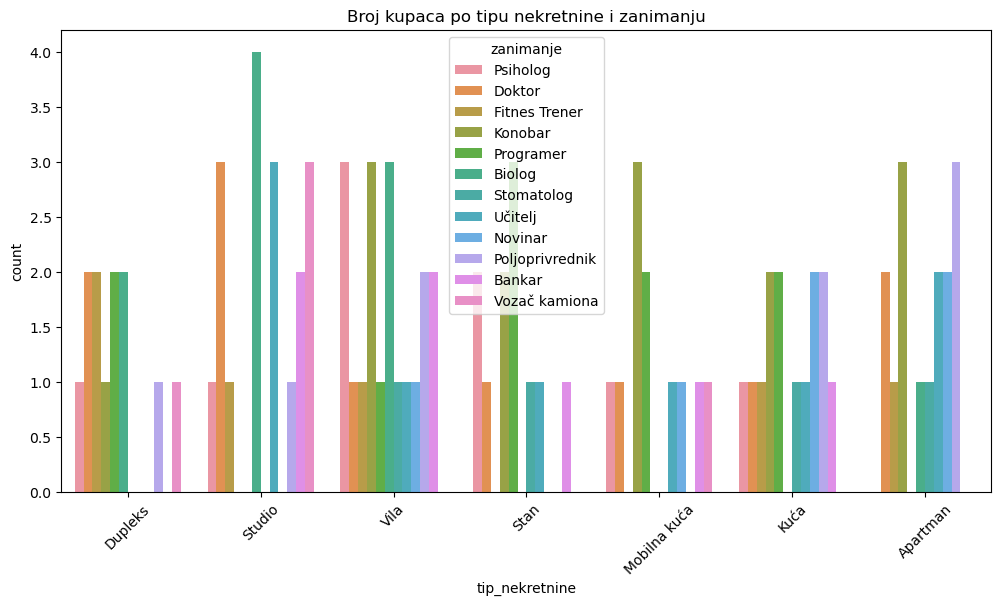

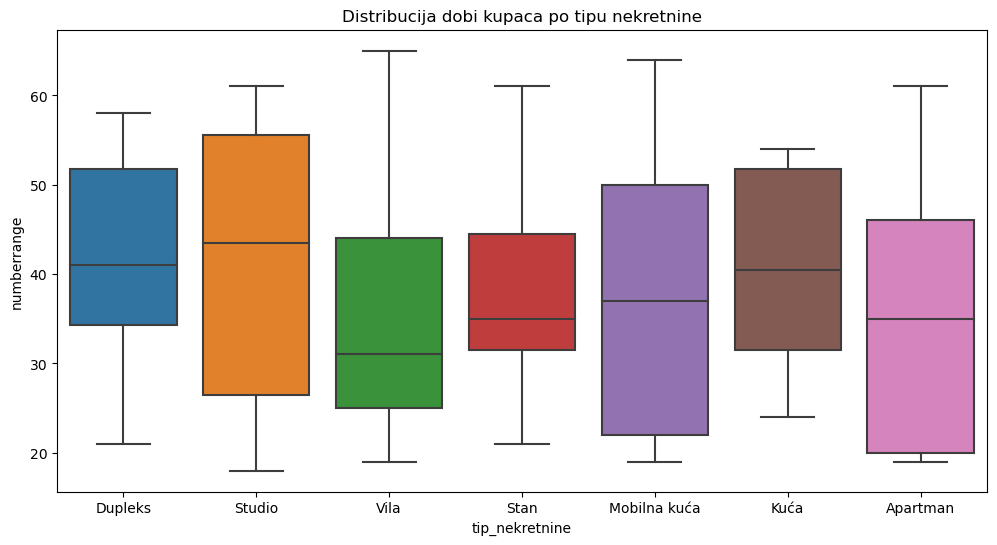

In [6]:
# Analiza i Vizualizacija za 'tip_nekretnine' i 'zanimanje'
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_data, x='tip_nekretnine', hue='zanimanje')
plt.title('Broj kupaca po tipu nekretnine i zanimanju')
plt.xticks(rotation=45)
plt.show()

# Analiza i Vizualizacija za 'tip_nekretnine' i 'dob'
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='tip_nekretnine', y='numberrange')
plt.title('Distribucija dobi kupaca po tipu nekretnine')
plt.show()

In [7]:
# Analiza za 'tip_nekretnine' i 'zanimanje'
zanimanja_po_tipu_nekretnine = combined_data.groupby('tip_nekretnine')['zanimanje'].value_counts()
print("Broj kupaca po tipu nekretnine i zanimanju:")
print(zanimanja_po_tipu_nekretnine)

najcesca_zanimanja = combined_data.groupby('tip_nekretnine')['zanimanje'].agg(lambda x: x.mode()[0])
print("\nNajčešća zanimanja po tipu nekretnine:")
print(najcesca_zanimanja)

# Analiza za 'tip_nekretnine' i 'dob' (ako 'dob' postoji)
if 'dob' in combined_data.columns:
    prosjecna_dob = combined_data.groupby('tip_nekretnine')['dob'].mean()
    medijan_dob = combined_data.groupby('tip_nekretnine')['dob'].median()
    print("\nProsjek i medijan dobi kupaca po tipu nekretnine:")
    print("Prosjek dobi:")
    print(prosjecna_dob)
    print("Medijan dobi:")
    print(medijan_dob)


Broj kupaca po tipu nekretnine i zanimanju:
tip_nekretnine  zanimanje      
Apartman        Poljoprivrednik    3
                Konobar            3
                Doktor             2
                Novinar            2
                Učitelj            2
                Biolog             1
                Fitnes Trener      1
                Stomatolog         1
Dupleks         Biolog             2
                Programer          2
                Fitnes Trener      2
                Doktor             2
                Konobar            1
                Poljoprivrednik    1
                Psiholog           1
                Vozač kamiona      1
Kuća            Programer          2
                Poljoprivrednik    2
                Novinar            2
                Konobar            2
                Fitnes Trener      1
                Bankar             1
                Doktor             1
                Psiholog           1
                Stomatolog         1

## Kritički osvrt

Iako su podaci generirani, nisu stvarni, uz pomoć svih ovih komponenti uspjeli smo učitati podatke, spojiti dvije različite vrste dokumenta, CSV i JSON, uz pomoć Pandas-a. Taj spojeni dokument smo kasnije pomoću SQLite spremili u neku bazu podataka koju smo kasnije uspjeli pristupiti. Uz sve to podatke smo uspjeli vizualno i tekstualno analizirati i vidjeti da stereotipi, barem po našim podacima, nisu ispravni. Vjerujem da je zapravo široka primjena svih ovih aspekata koje sam koristio za ovaj projekt.

## Zaključak

Kao što sam već naveo uz pomoć svih ovih alata uspjeli smo dokazati da stereotipi nisu ispravni. 

Pored toga možemo zaključiti i da svi ovi alati dosta pomažu, olakšavaju i ubrzavaju posao analize podataka, pogotovo u slučajevima gdje imamo veliki broj podataka.

## Literatura

Dostupne vježbe s kolegija Programiranje za analizu podataka
GenerateData, https://generatedata.com/ zadnji put pristupljeno 10.01.2024
Silas Toms; Bill Parker; Dr. Christopher Tucker; René Rubalcava, Python for ArcGIS Pro: Automate cartography and data analysis using ArcPy, ArcGIS API for Python, Notebooks, and pandas , Packt Publishing, 2022.
N. Ari and M. Ustazhanov, "Matplotlib in python," 2014 11th International Conference on Electronics, Computer and Computation (ICECCO), Abuja, Nigeria, 2014, pp. 1-6, doi: 10.1109/ICECCO.2014.6997585.
How To Use the sqlite3 Module in Python 3, https://www.digitalocean.com/community/tutorials/how-to-use-the-sqlite3-module-in-python-3 ,By DavidMuller, zadnji put pristupano 12.01.2024.